# Regression

This is a series of basic examples for running linear regression with StatWrap. It's more typical to use a package like sklearn or statsmodels for regression, but StatWrap is written to imitate Google Sheets/Excel. 

Beyond StatWrap, there are two well known libraries for running regressions in Python, StatsModels and Scikit-Learn.  Use StatWrap if you want to keep things simple. Use Scikit-Learn if you are interested in machine learning applications. Use StatsModels if you are focused on pure stats (eg statistical inference) or want something closer to R. It's a more natural choice for this course than scikit-learn.

## StatWrap

### Imports

Run the typical three starter lines in a Google Colab (suggested) or Jupyter notebook. 

In [1]:
!pip install --upgrade statwrap
import statwrap
%use_all

### Example 1 

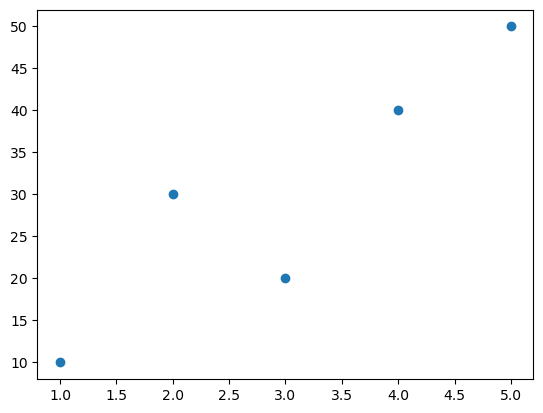

Correlation: 0.8999999999999999


In [2]:
x = 1, 2, 3, 4, 5
y = 10, 30, 20, 40, 50

scatter_plot(x,y)

print('Correlation:', correl(x,y))

In [3]:
# Direct Estimation

regression_line = linest(y, x)
regression_line

In [4]:
# predict y for x = 1 and x = 2

regression_line(1), regression_line(2)

(12.000000000000009, 21.000000000000007)

In [5]:
# Use correlation

correlation = correl(x,y)
sd_x = sd(x)
sd_y = sd(y)

slope = correlation * sd_y/sd_x

# y_average = intercept + slope*x_average 
intercept = average(y) - slope*average(x)

print(f'predicted Y = {intercept} + {slope}*X')

predicted Y = 3.0 + 9.0*X


### Example 2 - Read from CSV

Now we use a package called pandas to import data. Pandas does not have to be explicitly imported because of the `%use_all` command we used earlier. Later, we use a package called matplotlib to plot a regression line. Again, matplotlib doesn't have to be explicitly imported. 

In [6]:
url = 'https://raw.githubusercontent.com/alexanderthclark/Stats1101/main/Data/FatherSonHeights/pearson.csv'

# load a DataFrame
df = pd.read_csv(url)

# inspect first five rows
df.head()

,Father,Son
0,65.0,59.8
1,63.3,63.2
2,65.0,63.3
3,65.8,62.8
4,61.1,64.3


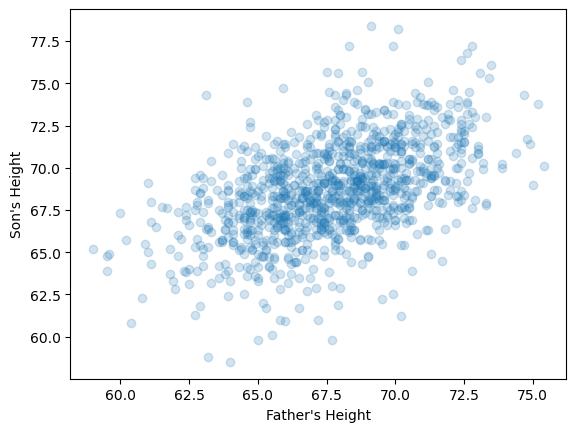

In [7]:
father = df.Father
son = df.Son

scatter_plot(father, son,
             xlabel = "Father's Height",
             ylabel = "Son's Height",
             alpha = 0.2) # reduce opacity of points

In [8]:
reg_line = linest(son, father) # y then x
reg_line

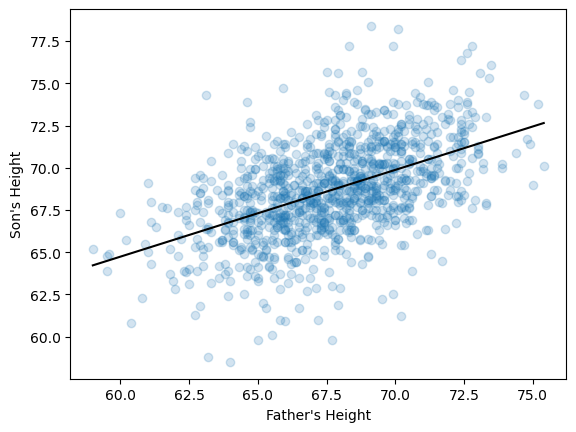

In [9]:
scatter_plot(father, son,
             xlabel = "Father's Height",
             ylabel = "Son's Height",
             alpha = 0.2, # reduce opacity of points
             show = False) # tell Python to let us add more stuff to the plot

# Add regression line using matplotlib
x_range = father.min(), father.max()
y_predictions = reg_line(x_range) 
plt.plot(x_range, y_predictions, color = 'black')
plt.show()

## StatsModels

In [10]:
import statsmodels.api as sm

# data
x = (1,2,3,4,5)
y = (1,4,3,4,10)

# Add a constant to the model (intercept)
X = sm.add_constant(x)

# Fit the model
model = sm.OLS(y, X).fit()
#model.summary()

In [11]:
# coefficients for intercept, slope
model.params

array([-1. ,  1.8])

In [12]:
residuals_sm = model.resid

## StatsModels for R Users

In [13]:
import statsmodels.formula.api as smf
import pandas as pd

data = pd.DataFrame({"x": x, "y": y})

In [14]:
model_smf = smf.ols(formula='y ~ x', data=data).fit()
residuals_smf = model_smf.resid
#model_smf.summary()

In [15]:
# coefficients for intercept, slope
model_smf.params

Intercept   -1.0
x            1.8
dtype: float64

## Scikit Learn

In [16]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Create a linear regression model
model_sk = LinearRegression()

# convert x and y to arrays
x_sk = np.array(x).reshape(-1,1)
y_sk = np.array(y)

# Run the regression
# note the order of x and y is different
model_sk.fit(x_sk, y_sk)

# Get the coefficients
print(f"Slope: {model_sk.coef_}")
print(f"Intercept: {model_sk.intercept_}")

Slope: [1.8]
Intercept: -1.0000000000000009


In [17]:
# Predictions
y_pred = model_sk.predict(x_sk)

# Calculate residuals
residuals_sk = y_sk - y_pred